# Assessment Problems
---

## Problem 1: Extending the Lady Tasting Tea
---
The original experiment of the Lady Tasting Tea has 8 cups, where 4 are tea-first and 4 are milk-first. The following problem is an extension of the original experiment, where 12 cups of tea are composed by 8 cups of tea-first and 4 cups with milk-first. In this experiment, I will check the probability of a person on identifying the cups by chance. In each step, I explain how I obtained these results. At the end, I will compare the results with the original 8-cup experiment that was analysed during the [lectures](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb).

### Libraries used

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
#https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/user/whatisnumpy.html
import numpy as np

# Plotting.
# https://matplotlib.org/stable/users/explain/quick_start.html#quick-start
import matplotlib.pyplot as plt

### Number of possible combinations

In [2]:
# Total number of cups of tea.
nr_cups = 12

# Number of cups of tea with milk poured in first.
nr_cups_milk_first = 4

# Number of cups of tea with tea poured in first.
nr_cups_tea_first = 8

To check the combinations, I use the math.comb to calculate the number of ways of selecting the 4 cups of tea with milk first from the total of 12 cups, and the result is the number of ways of selecting them without repetition and without regard to order.
https://docs.python.org/3/library/math.html#math.comb

#### Formula
The `math.comb()` function is represented by the following mathematical formula:
$\binom{n}{k} = \frac{n!}{k!(n-k)!}$

**k** is the number of elements to choose from a set of **n** element

In [3]:
# Number of ways of selecting 4 cups from 12.
way_1 = math.comb(nr_cups, nr_cups_milk_first)

# Show.
way_1

495

If I check the number of ways of selecting 8 cups of tea-first from the total of 12 cups, the result will be the same. This happens because picking 4 cups of milk-first is the equivalent of choosing 8 cups that don't have milk-first, and those are automatically the tea-first cups.

In [4]:
# Number of ways of selecting 8 cups from 12. 
way_2 = math.comb(nr_cups, nr_cups_tea_first)

# Show.
way_2

495

### Ordering of Results

Before performing the experiment of randomly identifying the 12 cups, they need to be labelled. To do this, the range() function generates the labels, and list() puts them into a list.

https://www.w3schools.com/python/ref_func_range.asp
https://www.geeksforgeeks.org/python/python-lists/
https://www.geeksforgeeks.org/python/range-to-a-list-in-python/

In [5]:
# The cup labels.
labels = list(range(nr_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In the next step, the module random has the function random.sample() that can be used to attribute the label milk-first to 4 of the 12 cups. Then .sort() puts the list of selected cups in ascending order of the label, and finally the machine shows the labels of the cups that have the milk-first.

https://docs.python.org/3/library/random.html#random.sample
https://www.w3schools.com/python/ref_list_sort.asp

In [6]:
# Select 4 cups at random to pour milk in first.
labels_milk = random.sample(labels, 4)

# Sort, in place.
labels_milk.sort()

# Show.
labels_milk

[2, 3, 7, 11]

Before calculating the overlap of total combinations that represent the number of correct guesses, for example 1,2,3 or 4 correct guesses, these have to be iterable and this can be done through the intertools.combinations.

https://www.geeksforgeeks.org/python/itertools-combinations-module-python-print-possible-combinations/
https://docs.python.org/3/library/itertools.html#itertools.combinations

In [7]:
# Generate an iterable of all possible combinations of selecting nr_cups_milk_first cups from the total cups.
combs = list(itertools.combinations(labels, nr_cups_milk_first))

# Show every combination.
#combs

# Number of combinations.
len(combs)

495

### Overlaps in the combinations

Now, I can simulate the experiment, by counting the number of overlaps for each combination. These are stored in the nr_overlaps array. The `for` function loops through all the combinations that are possible. 

The s1 represents each combination. The s2 is the milk-first cups, this list needs to be converted into a set, because the order of selection doesn't matter. Then .intersection() checks how many combinations in s1 contain any elements from s2. After that, len() counts the number of the overlaps and .append() adds this results to the nr_overlaps. 
 
https://wiki.python.org/moin/ForLoop
https://docs.python.org/3/tutorial/datastructures.html#sets
https://www.w3schools.com/python/ref_set_intersection.asp
https://www.w3schools.com/python/ref_func_len.asp
https://realpython.com/python-append/#adding-items-to-a-list-with-pythons-append


In [8]:
# Calculate the overlap between each element of combs and labels_milk.
nr_overlaps = []

# Loop through the combinations.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap found.
  #print(comb, len(overlap), overlap)
  # Append overlap to nr_overlaps.
  nr_overlaps.append(len(overlap))

In this next step, NumPy with the function np.unique shows how many distinct overlaps can occur and the number of times each overlap happens.

 https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [9]:
# Count the number of times each overlap occurs.
counts = np.unique(nr_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

The results show that there are 5 different combination outcomes that can occur of randomly selecting the milk-first cups and how many times it happens:
- 0 correct, 70 combinations;
- 1 correct, 224 combinations;
- 2 correct, 168 combinations;
- 3 correct, 32 combinations;
- 4 correct, 1 combination.

For visual representation, Matplotlib can be used. The function plt.subplots() creates a figure with axes for plotting. The .bar creates a bar chart, where the x-axis represents the distinct overlap values in the first array in counts, and the y is the number of combinations founf for each overlap in the second array of counts. Finally, plt.show() displays the chart.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html

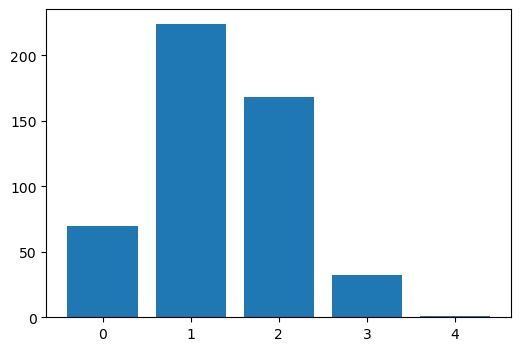

In [10]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1])

# Show.
plt.show()

### The Null Hypothesis

The Null Hypothesis suggest that a person can randomly select 4 cups of milk-first and 8 cups of tea-first from the total 12 cups at random, without any skill. To test this, I will check the probability from this extended experiment and compare it with the original.

In [11]:
# The probability to get right answer.
1 / 495

0.00202020202020202

In [12]:
# The probability that randomly selecting at least 3 correct cups with milk-first.
(32 + 1) / 495

0.06666666666666667

The probability of guessing correctly is much lower when the number of cups increases. Compared to the original 8-cup experiment, the probability of guessing all cups correctly is 0.014 (1.4%), much better than 0.002 (0.2%) in the 12-cup experiment. In the case of getting at least 3 cups correct, it's also better in the other 0.242 (24.2%) than in this case with 0.066 (6.6%).

Extending the experiment will make it even harder for the person trying to guess. The current p-value threshold already shows that this is very difficult on a null hypothesis case. The original cup experiment shows that correctly identifying all cups by chance under the null hypothesis is very unlikely, so relaxing the p-value threshold would still make the experiment valid and still be statistically meaningful. 

Under these conditions, rejecting the null hypothesis would indicate that the participant may be able to tell the difference, and in this case, the alternative hypothesis can be considered. 
Relaxing the p-value threshold would increase the risk of type I error, the false positives, and decrease the risk of type II error, the false negatives.


https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb
https://en.wikipedia.org/wiki/Power_(statistics)#Description
https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types
https://www.scribbr.com/statistics/type-i-and-type-ii-errors/#is-a-type-i-or-type-ii-error-worse


In [13]:
# The probability that randomly selecting at least one correct cup with milk first.
(224 + 168 + 32 + 1) / 495

0.8585858585858586

In [14]:
#### The probability that randomly selecting at least one correct cup with milk first in the 8 cup expirement.
(16 + 36 + 16 + 1)/70

0.9857142857142858

In [15]:
# The probability that randomly selecting no correct cup with milk first.
70/495

0.1414141414141414

## Problem 2: Normal Distribution
---
In problem 2, I generate 100 000 samples of size 10 from the standard normal distribution. For each sample, I compute the Standard Deviation (SD) using two different values for the Delta Degrees of Freedom (ddof), sample SD with ddof=1 and population SD with ddof=0.

The ddof is a parameter that represents the number of values that are free to vary in a statistic calculation. When checking the variance from a random sample of N independent observations, then the degrees of freedom is equal to the total number of independent observations (N) minus the number of parameters used as intermediate steps, for examples the sample mean. In this case, the degrees of freedom are 𝑁−1

In this problem, I will plot histograms of both sets, analyse the differences between them and explain if changes in sample size have a significant impact.

https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)

### Libraries

This problem uses some of the libraries used in problem 1, NumPy and Matplotlib and also uses the following:

In [16]:
# Statistics.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

### Generating data
To generate the samples, the function np.random.normal from NumPy creates 100 000 samples of size 10.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
https://realpython.com/numpy-random-normal/#how-to-use-numpy-to-generate-normally-distributed-random-numbers

In [17]:
# Generate samples from a standard normal distribution, 100 000 samples of size 10.
samples = np.random.normal(loc=0, scale=1, size=(100000, 10))

To check the generated data, I check the means of each sample with np.mean. Then I plot the distribution of these means in a bar chart to really confirm that this data is normally distributed, with the assistance of a Gaussian line, the bell curve.

#### Formula 
The formula of Normal Distribution or Gaussian Distribution is:
$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $

https://numpy.org/doc/stable/reference/generated/numpy.mean.html
https://en.wikipedia.org/wiki/Normal_distribution

In [18]:
# Calculate mean.
means = np.mean(samples, axis=1)

# Show.
means

array([ 0.12175048, -0.09312012, -0.00562104, ..., -0.1314878 ,
        0.09848488, -0.14172832])

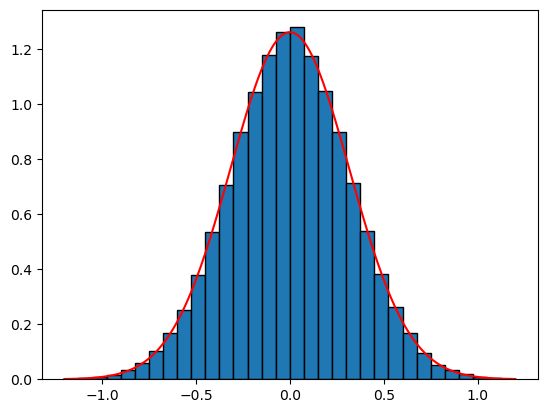

In [19]:
# Create a plot.
fig, ax = plt.subplots()

# Create a histogram.
ax.hist(means, edgecolor='black', density=True, bins=np.linspace(-1.2,1.2, 33))

# Define the Gaussian function.
def f(x, mu=0.0, sigma=1.0):
    """
    Calculate the probability density of the normal (Gaussian) distribution for a given x.
    """
    # The normalisation constant.
    norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
    # Return the probability.
    return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

# Create an x range.
x = np.linspace(-1.2, 1.2, 1001)

# Get y values.
y = f(x, mu=0.0, sigma=1.0 / np.sqrt(10))

# Plot the function.
ax.plot(x, y, 'r-')

# Show.
plt.show()

I can do further testing of this data with a Q-Q plot, which will show if the data is normally distributed. In this Normality test, the samples need to be 1d array, and these can be reshaped with .ravel().

Then to create the Q-Q plot, stats.probplot shows the probability plot of sample data against the quantiles of ordered values. If the points are closer to the line, it indicates that normality is present in the samples.

https://www.graphpad.com/support/faq/what-is-a-qq-normality-plot-how-can-i-make-one-with-graphpad-prism/
https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
https://docs.vultr.com/python/third-party/numpy/ravel
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

((array([-4.82696512, -4.64718223, -4.54998406, ...,  4.54998406,
          4.64718223,  4.82696512]),
  array([-5.09613713, -4.78916976, -4.52492271, ...,  4.75903252,
          4.81481776,  4.83209822])),
 (0.9995952726189405, 0.0003958922703533298, 0.9999984455377824))

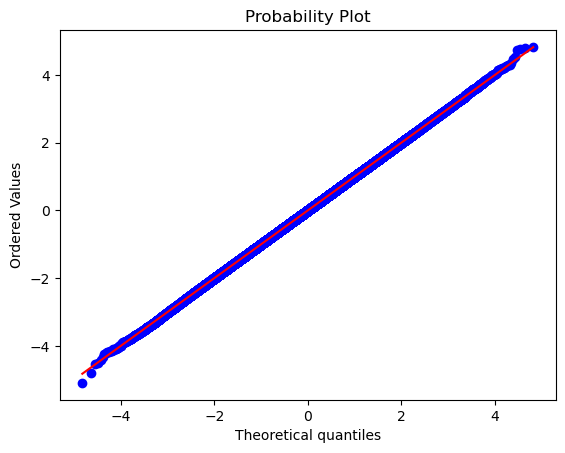

In [20]:
# Create an empty plot.
fig, ax = plt.subplots()

# Create a q-q plot.
stats.probplot(samples.ravel(), dist='norm', plot=ax)

### Generating Population SD and Sample SD
In this step, I generate the population SD and Sample SD. For this, np.std creates a standard deviation of each sample. These 2 are generated in 2 different situations, in Sample SD the ddof=1 and in Population SD the ddof=0. Both sets are plotted in the same axis so they can be compared.

According to the NumPy documentation, ddof=0 represents the
>"... sometimes called the “population standard deviation” in the field of statistics because it applies the definition of standard deviation to *a* as if *a* were a complete population of possible observations."

and then ddof=1 applies
>"...“Bessel’s correction” because it corrects for bias (toward lower values) in the variance estimate introduced when the sample mean of *a* is used in place of the true mean of the population. The resulting estimate of the standard deviation is still biased, but less than it would have been without the correction."

https://numpy.org/doc/stable/reference/generated/numpy.std.html

In [21]:
# Sample standard deviation (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Population standard deviation (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

Now for plotting, I created a figure with axes with plt.subplots(). Then, I plotted both histograms, ax.hist, with the following settings:
- histtype='step' type that outlines the histograms, for a clear representation both of them; 
- bins evenly spaced with np.linspace; 
- each with different colors; 
- labels to identify each; 
- and with density=True to return a probability density.

After that, I set labels for both axis, ax.set_xlabel and ax.set_ylabel. Finally, I add title ax.set_title, legend ax.legend(), grid ax.grid() and show with plt.show().

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html

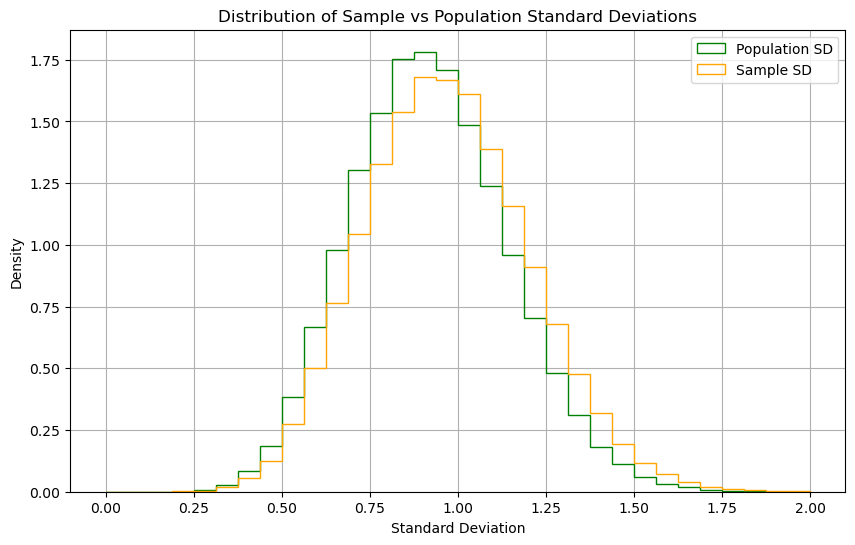

In [22]:
# Create figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms of both standard deviations.
ax.hist(population_sd, histtype='step', bins=np.linspace(0.0, 2.0, 33), color='green', label='Population SD', density=True)
ax.hist(sample_sd, histtype='step', bins=np.linspace(0.0, 2.0, 33), color='orange', label='Sample SD', density=True)

# Add labels and title.
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.set_title('Distribution of Sample vs Population Standard Deviations')

# Add legend.
ax.legend()

# Add grid.
ax.grid(visible=True)

# Show.
plt.show()

The histogram shows that Sample SD (ddof=1) is more centered, closer to the true Standard Deviation of 1, compared with population SD (ddof=0). The mean of the sample SD is slightly larger than the mean of the population SD, reflecting that dividing by N-1 provides an unbiased estimate, whereas dividing by N slightly underestimates the true standard deviation.

With small sample sizes, the sample SD distribution is slightly wider than the population SD due to Bessel’s correction, which causes more variability in the sample SD estimates compared with the population SD.

https://en.wikipedia.org/wiki/Bessel%27s_correction
https://docs.vultr.com/python/third-party/numpy/std#using-numpys-std-function
https://tidystat.com/when-to-use-ddof1-in-np-std/

Now, I will check if there are significant changes if the sample size is increased. This time, the number os samples are still 100 000 but each sample has a size of 100 instead of 10. The steps to generate the samples, calculate the sample SD and population SD are similar to previous process above.

In [23]:
# Generate samples from a standard normal distribution, 100 000 samples of size 100.
samples_2 = np.random.normal(loc=0, scale=1, size=(100000, 100))

# Sample standard deviation (ddof=1)
sample_sd_2 = np.std(samples_2, axis=1, ddof=1)

# Population standard deviation (ddof=0)
population_sd_2 = np.std(samples_2, axis=1, ddof=0)

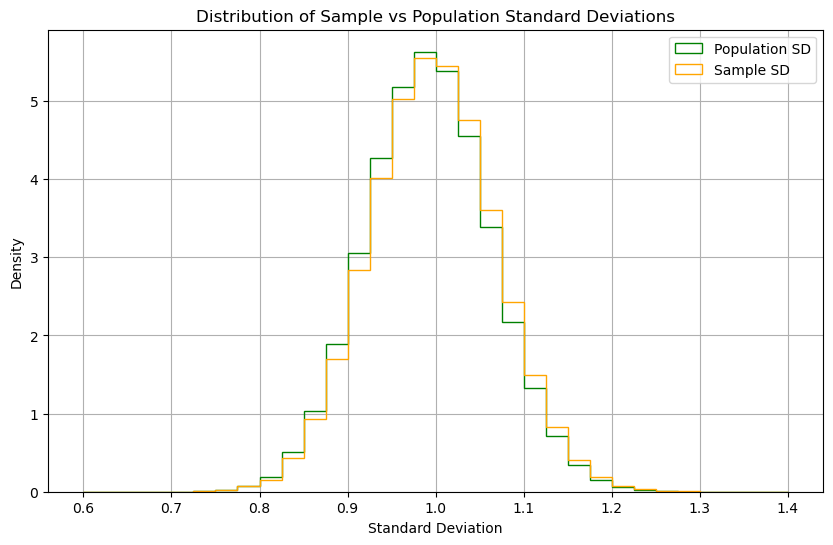

In [24]:
# Create figure and axis.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for population SD and sample SD.
ax.hist(population_sd_2, histtype='step', bins=np.linspace(0.6, 1.4, 33), color='green', label='Population SD', density=True)
ax.hist(sample_sd_2, histtype='step', bins=np.linspace(0.6, 1.4, 33), color='orange', label='Sample SD', density=True)

# Add labels and title.
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Density')
ax.set_title('Distribution of Sample vs Population Standard Deviations')

# Add legend.
ax.legend()

# Add grid.
ax.grid(visible=True)

# Show.
plt.show()

After analysing the histograms, with the increasing of samples sizes, the difference between the two histograms becomes smaller and more centered around the true standard deviation of 1. This condition is especially visible in the population SD that is now with histogram close to the value of 1 instead of around 0.9 in previous histogram with smaller sample sizes. 

The variation in the standard deviation also decreased, and are now between 0.75 and 1.3, while the previous histogram were between 0.25 and 2.0. In conclusion, the distributions become narrower with larger samples sizes, as standard deviation estimates become more stable.

## Problem 3: t-Tests
---
A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference d=0,0.1,0.2,…,1.0 , repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

In this problem, I will check how many times the type II error occurs when a test doesn’t reject the null hypothesis, even though it should. To investigate this, I will also look how the type II error rate changes with different d mean, 𝑑=0,0.1,0.2,…,1.0. To see how often this happens, I will run this simulation 1,000 times:

1. Generate two independent samples of size 100, one from  standard normal distribution and one from a normal distribution with mean 𝑑;

2. Run a two-sample t-test, rejecting the null hypothesis if the p-value < 0.05 (5% significance level);

3. Compute the proportion of non-rejections.

Finally, I will plot this proportion against 𝑑 and interpret how the type II error rate varies as the mean difference between the two means grows.

### Libraries

This problem uses some of the libraries used in the previous problems, NumPy, Matplotlib and SciPy. It also uses the following:

In [25]:
# Statistical plots.
# https://seaborn.pydata.org/
import seaborn as sns

### T-test in 2 samples

Before  running the full simulation 1000 times, I will first check 2 samples of size 100 with a standard normal distribution with different means. Seaborn is very handy to analyse the differences between the distributions, and with sns.boxplot is possible to analyse quite well.

https://seaborn.pydata.org/generated/seaborn.boxplot.html

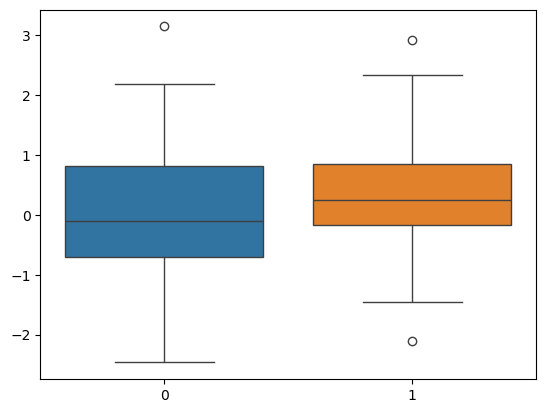

In [26]:
# sample with normal distribution.
normal_samples = np.random.normal(0, 1, 100)

# sample with normal distribution with mean 0.5.
normal_d_0_5 = np.random.normal(0.5, 1, 100)

# Box plot.
sns.boxplot(data=[normal_samples, normal_d_0_5])

# Show.
plt.show()

As expected the sample with the mean 0.5 tends to have higher values than the sample with mean 0.

To inspect the differences between the two samples, the t-test is very important as it checks the difference between the means of two samples and check if there's a similar variance between them. The function stats.ttest_ind performs this test and outputs a TtestResul with 3 values: statistic, pvalue and df (degrees of freedom). The p-value is what is important for this problem, to evaluate if the two samples are likely to come from distributions with the same mean. The null hypothesis can be rejected is the p-value < 0.05.

https://www.investopedia.com/terms/t/t-test.asp#toc-what-is-a-t-test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats._result_classes.TtestResult.html#scipy.stats._result_classes.TtestResult
https://en.wikipedia.org/wiki/P-value

In [27]:
# Perform a t-test.
stats.ttest_ind(normal_samples, normal_d_0_5)

TtestResult(statistic=-2.519872107216499, pvalue=0.012529606596146521, df=198.0)

As the result shows, the null hypothesis is rejected for these two samples as p-values is smaller than 0.05, indicating a significant difference between their means.

In a case where the means are the same, the p-value is expected to be higher than 0.05 as both samples are drawn under the same conditions, because there is no real difference between the groups. The null hypothesis is not rejected as demonstrated by the t-test result below.

In [28]:
# sample with normal distribution.
normal_samples = np.random.normal(0, 1, 100)

# sample with normal distribution with mean 0.
normal_d_0 = np.random.normal(0, 1, 100)

# Perform a t-test.
stats.ttest_ind(normal_samples, normal_d_0)

TtestResult(statistic=0.8434950016022413, pvalue=0.3999695262838239, df=198.0)

### Simulation of t-test 1000 times

In this next section, I run 1000 simulations to address the problem. For this, I create:
- an array with the different d values to use, ranging from 0.0 to 1.0 in increments of 0.1, rounded to one decimal place.
- a variables with the number of simulations to run;
- a dictionary to store the all the pair samples generated in the 1000 simulations done in the for loop. Each key corresponds to a
specific d value, and the value is a list of sample pairs; 
- a nested for-loop to generate the samples:
    - with the outer loop going through each different d. For each d, it will do the simulation in the inner loop;
    - The inner for loop is repeating with `for _ in range(n_simulations)`. For each simulation, this is creating one sample with a standard normal distribution and another with a standard normal distribution with a mean d;
    - The pair samples are stored in a list. After all simulations, the list is then stored in the dictionary.

This prepares the data so that a t-test can be performed on each pair of samples in the next step.

https://numpy.org/doc/2.3/reference/generated/numpy.arange.html
https://numpy.org/doc/stable/reference/generated/numpy.round.html
https://realpython.com/python-range/#repeat-an-operation

In [29]:
# Mean d values.
#d_values = np.arange(0, 1.1, 0.1)
d_values = np.round(np.arange(0, 1.1, 0.1), 1)

# Number of simulations
n_simulations = 1000

# Dictionary to store all samples.
all_samples = {}

# A for loop to generate samples for each mean d value.
for d in d_values:
    two_samples = []
    for _ in range(n_simulations):
        # Sample from standard normal distribution with mean 1 and standard deviation 1.
        normal_samples = np.random.normal(loc=0, scale=1, size=100)
        # Sample from standard normal distribution with mean d and standard deviation 1.
        normal_d = np.random.normal(loc=d, scale=1, size=100)
        # Append the 2 samples.
        two_samples.append((normal_samples, normal_d))
    # Store the generated samples.
    all_samples[d] = two_samples

Now that the sample pairs are generated, I can preform the t-test. The problem requests to count the number of times that the null hypothesis is not rejected, as the p-values are higher than 0.05.

For this, I created a variable that keeps track of how many times the the null hypothesis is not rejected for each different d mean. The the for loop will add the number of this occurrences in this variable.

To do the t-test for the sample pairs for each d, a for-loop of the all samples is also necessary. The samples.items have many sample_pairs for each mean d. In this nested loop there is:
- an outer loop, the variable `not_rejected_count` checks how many times the null hypothesis is not rejected in the inner loop;
- an inner loop does a t-test for each sample pairs, will check the p-value and add the number of times p-value is >0.05 in the variable in the outer loop;
- the proportions are then calculated for each d. Every number of times that the null hypothesis was not rejected divided by the total test done.

Finally, to print the proportions, I do a for-loop for each mean d, and results of those proportions.

In [30]:
# Proportion of times the null hypothesis is NOT rejected for each mean difference d.
proportions_not_rejected = {}

# Loop through each mean difference d and its associated list of sample pairs.
for d, sample_pairs in all_samples.items():
    # Counter to track how many times the null hypothesis is not rejected.
    not_rejected_count = 0
    
    # Loop through all sample pairs.
    for normal_samples, normal_d in sample_pairs:
        # Perform t-test on the two samples.
        t_stat, p_value = stats.ttest_ind(normal_samples, normal_d)
        # If the p-value is greater than or equal to 0.05, then the null hypothesis is not rejected.
        if p_value >= 0.05:
            not_rejected_count += 1 
    # Calculate the proportion of times the null was not rejected.
    proportions_not_rejected[d] = not_rejected_count / len(sample_pairs)
    
# Print the proportion not rejected for each mean difference d.
for d, prop in proportions_not_rejected.items():
    print(f"d={d}: proportion not rejected = {prop}")

d=0.0: proportion not rejected = 0.95
d=0.1: proportion not rejected = 0.896
d=0.2: proportion not rejected = 0.702
d=0.3: proportion not rejected = 0.454
d=0.4: proportion not rejected = 0.196
d=0.5: proportion not rejected = 0.069
d=0.6: proportion not rejected = 0.005
d=0.7: proportion not rejected = 0.001
d=0.8: proportion not rejected = 0.0
d=0.9: proportion not rejected = 0.0
d=1.0: proportion not rejected = 0.0


Now to plot the results, I create a figure with axis labels, a title and a grid.
To visualise the proportions of not rejected samples for each d, I use the dictionary `proportions_not_rejected`. The .keys() gets the different d's and .values() gets the corresponding proportions. I convert both to lists to have them in a proper sequence for plotting.

https://www.w3schools.com/python/ref_func_list.asp#:~:text=The%20list()%20function%20creates,in%20the%20chapter%3A%20Python%20Lists.
https://www.w3schools.com/python/ref_dictionary_keys.asp
https://www.w3schools.com/python/ref_dictionary_values.asp
https://stackoverflow.com/questions/61756232/understanding-accessing-the-key-and-value-in-dictionaries-python


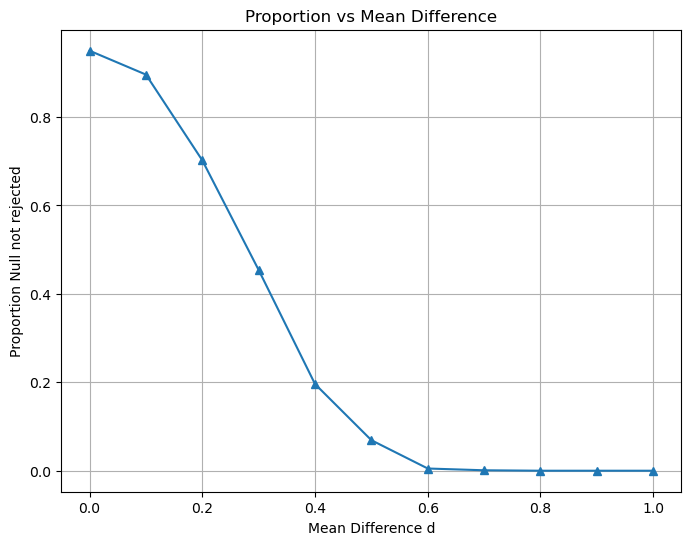

In [31]:
# Create a new figure. 
plt.figure(figsize=(8,6))

# Plot the dictionary keys (mean differences d) against the values (proportion not rejected).
plt.plot(list(proportions_not_rejected.keys()), 
         list(proportions_not_rejected.values()), 
         marker='^', linestyle='-')

# Label the x-axis.
plt.xlabel('Mean Difference d')

# Label the y-axis.
plt.ylabel('Proportion Null not rejected')

# Add a title.
plt.title('Proportion vs Mean Difference')

# Add grid.
plt.grid(visible=True)

# Plot the results.
plt.show()

Type II error rate (β) is the probability of failing to reject the null when the alternative is true.

From the plot, while the mean difference d increases, the proportion of times the null hypothesis is not rejected decreases. 

In the simulation, d = 0 corresponds to the null being true, so the proportion not rejected is around 0.9, which is much higher than 0.05. The small proportion of cases where the null is rejected corresponds to the Type I error rate. Type II error does not exist in this case, because the null is true.

For d ≠ 0, this proportion corresponds to the Type II error rate. When d is very small, the two distributions are very similar. The test has a hard time detecting the difference, so the test fails to reject the null more often, making β large.

As the mean difference d increases, the two distributions become more distinct and separated. The test detects differences more often, and the proportion of times the null is not rejected decreases, meaning the Type II error rate decreases.

So the curve starts high near d=0 and drops towards zero as d increases. At large 𝑑, 1.0, The test almost always rejects the null, so the Type II error rate approaches 0. 

Therefore, the Type II error is largest when the difference in means is small, and it decreases as the difference in means grows. This reflects the intuitive idea that it is harder to detect small differences than large ones.

## Problem 4: ANOVA
---
Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

In this problem, there are 3 samples, each of size 30, drawn from a normal distribution with means 0, 0.5 and 1, all with a standard deviation 1. 
- First, I will do a one-way ANOVA test to check their means, is they are different or equal.
- Then, I will do 3 independent t-tests, two-sample tests between samples 1 vs 2, 1 vs 3 and 2 vs 3.
- After that, I will analyse the results of both ANOVA and t-tests.
 
Finally, I will conclude why ANOVA is preferred test than running multiple t-tests.

### Libraries

This problem uses some of the libraries used in the previous problems, NumPy, Matplotlib and SciPy. It also uses the Pandas.

https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas

In [32]:
# Data frames.
import pandas as pd

### Generating and checking the samples
The 3 samples can be generated in the same way as in the previous problem, using np.random.normal(). All samples have a normal distribution, with size 30 and only differing on their means, sample 1 has mean 0, sample 2 has mean 0.5 and sample 3 has mean 1.

In [33]:
# Sample with normal distribution with mean 0.
sample_1 = np.random.normal(0, 1, 30)

# Sample with normal distribution with mean 0.5.
sample_2 = np.random.normal(0.5, 1, 30)

# Sample with normal distribution with mean 1.
sample_3 = np.random.normal(1, 1, 30)

Now I will plot each sample group and visually analyse how they are distributed. Each histogram has 10 bins and alpha is set to 0.5 to add transparency in order to be able to make it easier to identify each group. All samples are labelled and a legend is included.

https://matplotlib.org/stable/gallery/color/set_alpha.html#ways-to-set-a-color-s-alpha-value

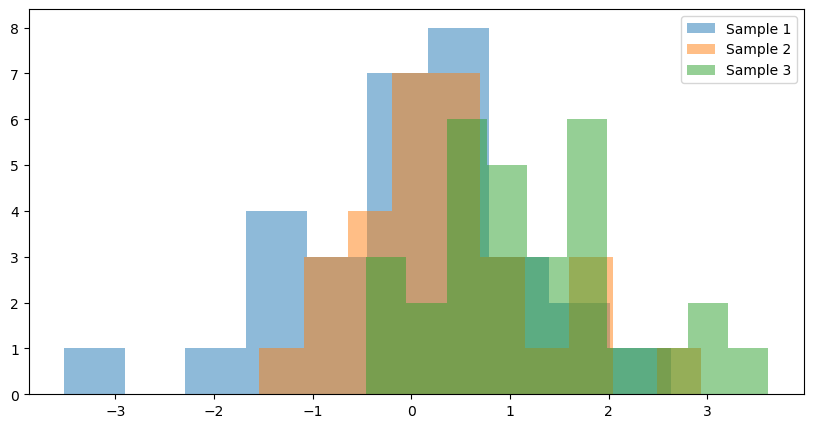

In [34]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_1, bins=10, alpha=0.5, label='Sample 1')

# Histogram of the second sample.
ax.hist(sample_2, bins=10, alpha=0.5, label='Sample 2')

# Histogram of the third sample.
ax.hist(sample_3, bins=10, alpha=0.5, label='Sample 3')

# Add a legend.
ax.legend();

The histogram shows that the 3 samples have different distributions. Sample 1 is shifted to the left, Sample 2 is in the middle, and Sample 3 is shifted to the right. This suggests that the group means should also be different, which I will confirm with the application of ANOVA and the t-tests.

I also created a data frame containing the 3 samples and used the .describe() function. This presents a statistic description about the groups, including measures like the count, mean, standard deviation, minimum and maximum values, and also the percentiles, providing an overview of the distribution of each sample.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [35]:
# Create data frame.
df = pd.DataFrame({'Sample_1': sample_1, 'Sample_2': sample_2, 'Sample_3': sample_3})

# Show.
# df.head()

# Describe.
df.describe()

,Sample_1,Sample_2,Sample_3
count,30.000000,30.000000,30.000000
mean,-0.029868,0.333716,1.241825
std,1.209633,0.975728,0.990253
min,-3.523480,-1.541004,-0.459699
25%,-0.788024,-0.204527,0.636194
50%,-0.003771,0.305481,1.112140
75%,0.594570,0.689027,1.837073
max,2.628479,2.939396,3.617800


The results demonstrated that the sample means are different, increasing from Sample 1 to Sample 2, and then from sample 2 to Sample 3.

However, these statistic results and the histograms only provides evidence that differences might exist. To really confirm this, ANOVA and t-tests will show if these differences are statistically significant.

### Analysis of Variance (ANOVA)

ANOVA is a statistical test used to compare the means between multiple groups. It determines if the differences in the groups observed are due to random variation of if there's a true distinction between them. 

There are two different types of ANOVA:
- The one-way ANOVA, involves 1 independent variable that affects 1 dependent variable, for example how the sample groups affect the mean values;
- the two-way ANOVA, involves 2 independent variables that affect 1 dependent variable, for example how the dose and the route of administration of a medication will affect the patients.

In this problem, a one-way ANOVA is used. To preform this, I use stats.f_oneway function that outputs 2 values, the f-statistic and the p-value. The p-value shows if the means of the group samples are equal or different.

https://www.investopedia.com/terms/a/anova.asp

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

In [36]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Sample_1'], df['Sample_2'], df['Sample_3'])

# Show.
print("f-statistic:", f_statistic, "p-value:", p_value)

f-statistic: 11.369987667867045 p-value: 4.104083186217773e-05


With the ANOVA test, the condition of null hypothesis is true if all 3 population means are equal.

In this example, the p-value is much smaller than the significance level of 0.05. I can reject the null hypothesis and conclude that at least one mean is significantly different. ANOVA shows that there's a difference among the groups, but it does not specify which one.

#### Tukey’s honestly significant difference (HSD)

After the ANOVA test, I can do further analysis on the groups to identify which pairs have significantly different means. This can be done with post hoc tests, like a Tukey’s HSD, or t-tests for each group pair. A post hoc test is:

>"... used only after we find a statistically significant result and need to determine where our differences truly came from."

The Tukey’s HSD test is used to compare the means between three or more groups, while keeping the same level of significance. It ensures that the probability of incorrectly rejecting the null hypothesis remains consistent across multiple comparisons, by controlling the Type I error rate.

https://stats.libretexts.org/Courses/Kennesaw_State_University/Statistical_Applications_in_Psychological_Sciences_with_Multimedia/11%3A_One-Way_Analysis_of_Variance/11.03%3A_ANOVA_Post-Hoc_Tests

https://fiveable.me/key-terms/cognitive-psychology/tukeys-hsd

https://docs.scipy.org/doc/scipy-1.11.4/reference/generated/scipy.stats.tukey_hsd.html

In [37]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Sample_1'], df['Sample_2'], df['Sample_3'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.364     0.386    -1.019     0.291
 (0 - 2)     -1.272     0.000    -1.927    -0.617
 (1 - 0)      0.364     0.386    -0.291     1.019
 (1 - 2)     -0.908     0.004    -1.563    -0.253
 (2 - 0)      1.272     0.000     0.617     1.927
 (2 - 1)      0.908     0.004     0.253     1.563



All 3 pair groups comparisons show significant differences between the means. The results show that group 1 and group 3 represented by `(0-2)` in the test have a really small p-value, p<0.001, so it's confirmed that those have the most different means. Group 1 and 2 `(0-1)` have a higher p-value, p=0.002, but still below the significance level, the same happens to group 2 with 3 `(1-2)` with p=0.007.

### T-test

The next step is to do t-tests between each pair of groups to determine is the sample groups differ significantly from each other. 
I will use the same function stats.ttest_ind, used previously in problem 3, and I will individually do this test between sample groups 1 vs 2, groups 1 vs 3 and groups 2 vs 3.
Then, I request the results to be printed, both t-statistic and the p-value.

In [38]:
# Independent samples t-test on sample_1 and sample_2.
t_statistic, p_value = stats.ttest_ind(sample_1, sample_2)

# Independent samples t-test on sample_1 and sample_3.
t_statistic_2, p_value_2 = stats.ttest_ind(sample_1, sample_3)

# Independent samples t-test on sample_2 and sample_3.
t_statistic_3, p_value_3 = stats.ttest_ind(sample_2, sample_3)

# Show.
print(f'Sample 1 vs 2: {t_statistic, p_value}\nSample 1 vs 3: {t_statistic_2, p_value_2}\nSample 2 vs 3: {t_statistic_3, p_value_3}')

Sample 1 vs 2: (-1.2813957563637475, 0.20515410593660388)
Sample 1 vs 3: (-4.455626801503443, 3.876793785402251e-05)
Sample 2 vs 3: (-3.5778533241585952, 0.0007075345793826291)


In these results, the sample groups 1 and 3 produce the smallest p-value, as expected, because their means are the farthest apart. The difference between their true means is larger than the difference between sample groups 1 and 2, or between sample groups 2 and 3. Both of them have a higher p-value but they're still below 0.05. 

Overall, Larger mean separation increases the t-statistic and lowers the p-value. All of the pair groups showed a significance level lower than 0.05, confirming that all are statistically different.

However, I notice that the result o p-value can vary while runing multiple t-tests, sometimes it's higher than 0.05, failling to reject the null hypothesis and supporting that both groups could be equal. This variability occurs because the test depends on the specific sample values drawn. This shows that the t-tests can be a bit inconsistant if the difference between these two groups is relatively small. To tackle this issue, the increase of sample size will make the test vary less in the results.

https://influentialpoints.com/Training/Two-sample_t-test_use_and_misuse.htm

### Compare the 2 tests

The one-way ANOVA tests the null hypothesis: H0= μ1=μ2=μ3​

Given that the samples are drawn from distributions with means 0, 0.5, and 1, ANOVA almost always finds a significant overall difference.
So ANOVA will typically reject the null hypothesis and conclude that at least one mean differs from the others. However, ANOVA does indicate which groups differs, only that not all means are equal.

On the other hand, the 3 pair group t-tests identifies which specific pairs differs. In this example, the t-tests reveal that all 3 pairs show differences, with the smallest p-value for samples 1 vs 3 due to the largest mean separation.

Overall, the results are consistent: ANOVA detects the overall effect, and the t-tests provide more detailed information on which pairs of groups differ.

https://www.raybiotech.com/t-test-anova

### Why ANOVA Is preferred over running several t-Tests

This problem is a simple example that shows why ANOVA is more appropriate than multiple t-tests. While ANOVA shows straight away if the groups have different means, the t-tests requires that each two-group combination is submitted to the test. This increases the workload and complicates interpretation.

While running multiple t-tests, each one has a Type I error rate of 5%, p-value 0.05. Running multiple two-group t-tests will increase the likelihood of this error. In practice, this means that some group pairs may show p‑values below 0.05, indicating statistically significant differences, while other pairs may show p‑values above 0.05, meaning there is not enough evidence to conclude a difference. Performing several tests increases the overall probability of making at least one false positive.

ANOVA avoids this problem by testing all group means at once using a single overall test, keeping the Type I error rate at the desired significance level (0.05). Additionally, ANOVA provides a more efficient and statistically coherent way to compare multiple groups. If the global ANOVA test is significant, it also allows for proper follow-up tests like Tukey’s HSD, to determine which specific group differences are significant.

https://www.clyte.tech/post/when-to-use-t-test-vs-anova?srsltid=AfmBOore97b2eLcophoPYB1ISZfU_AyXW9FyMIhPMG28HU-Y_JCcr3dM
https://www.scribbr.com/statistics/type-i-and-type-ii-errors/#type-i-error

---
## End